In [3]:
import matplotlib.pyplot as plt
import pandas as pd
import pylab as pl
import numpy as np
import seaborn as sns
%matplotlib inline


In [153]:
df = pd.read_csv("AV_LP_train.csv")

In [154]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.4+ KB


In [8]:
df.shape


(614, 13)

In [9]:
df.size


7982

In [10]:
df.columns.tolist()


['Loan_ID',
 'Gender',
 'Married',
 'Dependents',
 'Education',
 'Self_Employed',
 'ApplicantIncome',
 'CoapplicantIncome',
 'LoanAmount',
 'Loan_Amount_Term',
 'Credit_History',
 'Property_Area',
 'Loan_Status']

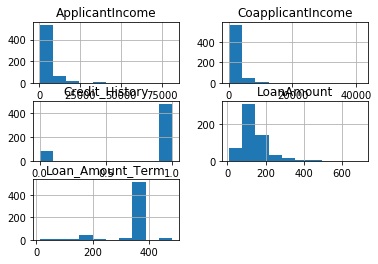

In [11]:
viz = df[['ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History']]
viz.hist()
plt.show()


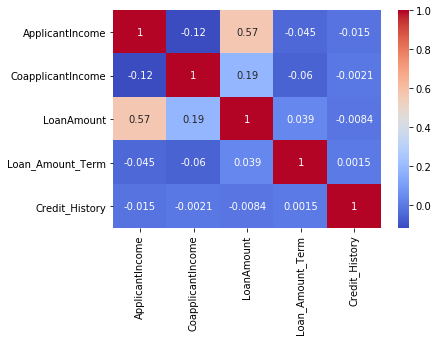

In [12]:
sns.heatmap(df.corr(),cmap='coolwarm',annot=True)


In [18]:
df.isnull().sum()
"""
Candidates for Null Handling
"""

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [16]:
df.isnull().sum().sum()

149

In [19]:
df.nunique()


Loan_ID              614
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
ApplicantIncome      505
CoapplicantIncome    287
LoanAmount           203
Loan_Amount_Term      10
Credit_History         2
Property_Area          3
Loan_Status            2
dtype: int64

In [20]:
df.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [21]:
df.Married.unique()

array(['No', 'Yes', nan], dtype=object)

In [22]:
df.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [23]:
df.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

In [24]:
df.Self_Employed.unique()

array(['No', 'Yes', nan], dtype=object)

In [25]:
df.Credit_History.unique()

array([ 1.,  0., nan])

In [26]:
df.Property_Area.unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [27]:
df.Loan_Status.unique()

array(['Y', 'N'], dtype=object)

In [31]:
"""
Candidates for Encoding/Labelling:
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
Credit_History         2
Property_Area          3
Loan_Status            2
"""


'\nCandidates for Encoding/Labelling:\nGender                 2\nMarried                2\nDependents             4\nEducation              2\nSelf_Employed          2\nCredit_History         2\nProperty_Area          3\nLoan_Status            2\n'

In [33]:
"""
Candidates for Null Handling
"""
df.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [124]:
df["Gender"].fillna("Male", inplace = True)
df["Married"].fillna("Yes", inplace = True)
df["Dependents"].fillna('0', inplace = True)
df["Self_Employed"].fillna("No", inplace = True)
df["Credit_History"].fillna(1, inplace = True)


In [53]:
df.Credit_History.isnull().sum()

0

In [51]:
df['Credit_History'].value_counts()

1.0    475
0.0     89
Name: Credit_History, dtype: int64

In [57]:
df.isnull().sum()

Loan_ID               0
Gender                0
Married               0
Dependents            0
Education             0
Self_Employed         0
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History        0
Property_Area         0
Loan_Status           0
dtype: int64

In [125]:
mean_LA = df["LoanAmount"].mean()
df["LoanAmount"].fillna(mean_LA, inplace = True)
mean_LAT = df["Loan_Amount_Term"].mean()
df["Loan_Amount_Term"].fillna(mean_LAT, inplace = True)

In [126]:
"""
All Nulls are handled
"""
df.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [72]:
"""
Candidates for Encoding/Labelling:
Gender                 2
Married                2
Dependents             4
Education              2
Self_Employed          2
Credit_History         2
Property_Area          3
Loan_Status            2
"""

'\nCandidates for Encoding/Labelling:\nGender                 2\nMarried                2\nDependents             4\nEducation              2\nSelf_Employed          2\nCredit_History         2\nProperty_Area          3\nLoan_Status            2\n'

In [76]:
df.Gender.unique()

array(['Male', 'Female'], dtype=object)

In [127]:
df["Gender"].replace("Male",1, inplace = True)
df["Gender"].replace("Female",0, inplace = True)


In [128]:
df.Dependents.unique()

array(['0', '1', '2', '3+'], dtype=object)

In [91]:
df.Dependents.unique()

array(['A', 'B', 'C', 'D'], dtype=object)

In [94]:
df.Education.unique()

array([1, 0], dtype=int64)

In [129]:
df["Education"].replace('Graduate',1, inplace = True)
df["Education"].replace('Not Graduate',0, inplace = True)

In [130]:
df.Self_Employed.unique()

array(['No', 'Yes'], dtype=object)

In [131]:
df["Self_Employed"].replace('Yes',1, inplace = True)
df["Self_Employed"].replace('No',0, inplace = True)

In [98]:
df.Self_Employed.unique()

array([0, 1], dtype=int64)

In [111]:
df.Loan_Status.unique()

array([1, 0], dtype=int64)

In [132]:
df["Loan_Status"].replace('Y',1, inplace = True)
df["Loan_Status"].replace('N',0, inplace = True)


In [133]:
df.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,No,0,1,0,5849,0.0,146.412162,360.0,1.0,Urban,1
1,LP001003,1,Yes,1,1,0,4583,1508.0,128.000000,360.0,1.0,Rural,0
2,LP001005,1,Yes,0,1,1,3000,0.0,66.000000,360.0,1.0,Urban,1
3,LP001006,1,Yes,0,0,0,2583,2358.0,120.000000,360.0,1.0,Urban,1
4,LP001008,1,No,0,1,0,6000,0.0,141.000000,360.0,1.0,Urban,1


In [114]:
'''
One Hot Encoding:
Dependents
Property Area
'''

'\nOne Hot Encoding:\nDependents\nProperty Area\n'

In [135]:
'''
Bring output column to first place
'''
cols = [df.columns[-1]] + [col for col in df if col != df.columns[-1]]
df = df[cols]
df.head()

,Loan_Status,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,LP001002,1,No,0,1,0,5849,0.0,146.412162,360.0,1.0,Urban
1,0,LP001003,1,Yes,1,1,0,4583,1508.0,128.000000,360.0,1.0,Rural
2,1,LP001005,1,Yes,0,1,1,3000,0.0,66.000000,360.0,1.0,Urban
3,1,LP001006,1,Yes,0,0,0,2583,2358.0,120.000000,360.0,1.0,Urban
4,1,LP001008,1,No,0,1,0,6000,0.0,141.000000,360.0,1.0,Urban


In [136]:
Dependents = pd.get_dummies(df['Dependents'],drop_first=True)
Property_Area = pd.get_dummies(df['Property_Area'],drop_first=True)

df.drop(['Dependents','Property_Area'],axis=1,inplace=True)

df = pd.concat([df,Dependents,Property_Area],axis=1)


C:\Users\Aniruddh\Anaconda3\lib\site-packages\pandas\core\frame.py:3697: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  errors=errors)


In [137]:
df.head()

,Loan_Status,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,1,2,3+,Semiurban,Urban
0,1,LP001002,1,No,1,0,5849,0.0,146.412162,360.0,1.0,0,0,0,0,1
1,0,LP001003,1,Yes,1,0,4583,1508.0,128.000000,360.0,1.0,1,0,0,0,0
2,1,LP001005,1,Yes,1,1,3000,0.0,66.000000,360.0,1.0,0,0,0,0,1
3,1,LP001006,1,Yes,0,0,2583,2358.0,120.000000,360.0,1.0,0,0,0,0,1
4,1,LP001008,1,No,1,0,6000,0.0,141.000000,360.0,1.0,0,0,0,0,1


In [138]:
'''
Z-score scaling
'''
df["ApplicantIncome"]=(df["ApplicantIncome"]-df["ApplicantIncome"].mean())/df["ApplicantIncome"].std()
df["CoapplicantIncome"]=(df["CoapplicantIncome"]-df["CoapplicantIncome"].mean())/df["CoapplicantIncome"].std()
df["LoanAmount"]=(df["LoanAmount"]-df["LoanAmount"].mean())/df["LoanAmount"].std()
df["Loan_Amount_Term"]=(df["Loan_Amount_Term"]-df["Loan_Amount_Term"].mean())/df["Loan_Amount_Term"].std()
df.head()


,Loan_Status,Loan_ID,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,1,2,3+,Semiurban,Urban
0,1,LP001002,1,No,1,0,0.072931,-0.554036,3.382028e-16,0.279623,1.0,0,0,0,0,1
1,0,LP001003,1,Yes,1,0,-0.134302,-0.038700,-2.190947e-01,0.279623,1.0,1,0,0,0,0
2,1,LP001005,1,Yes,1,1,-0.393427,-0.554036,-9.568608e-01,0.279623,1.0,0,0,0,0,1
3,1,LP001006,1,Yes,0,0,-0.461686,0.251774,-3.142903e-01,0.279623,1.0,0,0,0,0,1
4,1,LP001008,1,No,1,0,0.097649,-0.554036,-6.440178e-02,0.279623,1.0,0,0,0,0,1


In [140]:
'''
Send output column to last
'''
cols = [col for col in df if col != df.columns[0]] + [df.columns[0]] 
df = df[cols]
df.head()

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,1,2,3+,Semiurban,Urban,Urban,Urban,Urban,Loan_ID
0,1,No,1,0,0.072931,-0.554036,3.382028e-16,0.279623,1.0,0,0,0,0,1,1,1,1,LP001002
1,1,Yes,1,0,-0.134302,-0.038700,-2.190947e-01,0.279623,1.0,1,0,0,0,0,0,0,0,LP001003
2,1,Yes,1,1,-0.393427,-0.554036,-9.568608e-01,0.279623,1.0,0,0,0,0,1,1,1,1,LP001005
3,1,Yes,0,0,-0.461686,0.251774,-3.142903e-01,0.279623,1.0,0,0,0,0,1,1,1,1,LP001006
4,1,No,1,0,0.097649,-0.554036,-6.440178e-02,0.279623,1.0,0,0,0,0,1,1,1,1,LP001008


In [305]:
df = pd.read_csv("AV_LP_train.csv")
#df.head()

In [306]:
def df_feature_eng(df):
    #    Handle NaNs
    
    df["Gender"].fillna(df["Gender"].mode(), inplace = True)
    df["Married"].fillna(df["Married"].mode(), inplace = True)
    df["Dependents"].fillna('0', inplace = True)
    df["Self_Employed"].fillna(df["Self_Employed"].mode(), inplace = True)
    df["Credit_History"].fillna(1, inplace = True)
    df["LoanAmount"].fillna(df["LoanAmount"].mean(), inplace = True)
    df["Loan_Amount_Term"].fillna(df["Loan_Amount_Term"].mode(), inplace = True)
    
    #Drop all rows with Nan which are not handled in our code
    df.dropna()
        
    #    One Hot Encoding: ['Gender','Married','Dependents','Education','Self_Employed','Property_Area']
    
    # Send Output Colummn to First location
    cols = [df.columns[-1]] + [col for col in df if col != df.columns[-1]]
    df = df[cols]
    
    cat_col = ['Gender','Married','Dependents','Education','Self_Employed','Property_Area','Loan_Amount_Term']

    for i in cat_col:
        df1 = pd.get_dummies(df[i],prefix = i, drop_first=True)
        df = pd.concat([df,df1], axis = 1)

    df.drop(cat_col,axis=1,inplace=True)

    
    # Send output column to last
    cols = [col for col in df if col != df.columns[0]] + [df.columns[0]] 
    df = df[cols]
        
    # Labelling Could be merged with One Hot Encoding
    df["Loan_Status"].replace('Y',1, inplace = True)
    df["Loan_Status"].replace('N',0, inplace = True)
    
    #    Scaling/Normalizing features : Z-score scaling
    cat_col = ['ApplicantIncome','CoapplicantIncome','LoanAmount']

    for i in cat_col:
        df[i]=(df[i]-df[i].mean())/df[i].std()
        df.head()
    return df;

In [307]:
df = df_feature_eng(df)
df.head()

,Loan_ID,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,...,Loan_Amount_Term_36.0,Loan_Amount_Term_60.0,Loan_Amount_Term_84.0,Loan_Amount_Term_120.0,Loan_Amount_Term_180.0,Loan_Amount_Term_240.0,Loan_Amount_Term_300.0,Loan_Amount_Term_360.0,Loan_Amount_Term_480.0,Loan_Status
0,LP001002,0.072931,-0.554036,3.382028e-16,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1,LP001003,-0.134302,-0.038700,-2.190947e-01,1.0,1,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
2,LP001005,-0.393427,-0.554036,-9.568608e-01,1.0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
3,LP001006,-0.461686,0.251774,-3.142903e-01,1.0,1,1,0,0,0,...,0,0,0,0,0,0,0,1,0,1
4,LP001008,0.097649,-0.554036,-6.440178e-02,1.0,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


In [310]:
df.shape

(614, 24)

In [311]:
# 1st column is unique identifier
X=df.iloc[:,1:len(df.columns)-1]
y = df.iloc[:,len(df.columns)-1]
print (X.shape,  y.shape)

(614, 22) (614,)


In [312]:
#Train Test Split 80/20
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=4)
print ('Train set:', X_train.shape,  y_train.shape)
print ('Test set:', X_test.shape,  y_test.shape)

Train set: (491, 22) (491,)
Test set: (123, 22) (123,)


In [326]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
C = [0.001,0.01,0.1,1,10]
for c in C:
    LR = LogisticRegression(C=0.01, solver='liblinear').fit(X_train,y_train)
    yhat = LR.predict(X_test)
    #yhat
    accuracy = accuracy_score(y_test,yhat)
    print (c," --> ",accuracy)

0.001  -->  0.6829268292682927
0.01  -->  0.6829268292682927
0.1  -->  0.6829268292682927
1  -->  0.6829268292682927
10  -->  0.6829268292682927


In [331]:
#Random Forest CLassifier
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier(max_depth = 5,n_estimators=200)
rfc.set_params(n_jobs=-1).fit(X_train,y_train)
# Use the forest's predict method on the test data
predictions = rfc.predict(X_test)


Mean Absolute Error: 0.32 degrees.


In [335]:
# Calculate the absolute errors
errors = abs(yhat - y_test)
# Print out the mean absolute error (mae)
print('Mean Absolute Error:', round(np.mean(errors), 2), 'degrees.')
# Calculate mean absolute percentage error (MAPE)
mape = 100 * (errors / yhat)
# Calculate and display accuracy
accuracy = 100 - np.mean(mape)
print('Accuracy:', round(accuracy, 2), '%.')

Mean Absolute Error: 0.32 degrees.
Accuracy: 68.03 %.
